Data 620 - Week 6

Shamecca Marshall

Project Overview
Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
Dataset.
Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events? 

Import Data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import networkx.algorithms.bipartite as bipartite

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,10)

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

Biadjacency matrix

In [3]:
print(bipartite.biadjacency_matrix(G, women, clubs))

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


Women Degrees

In [4]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("# of Friends, Member")

W_degrees = {}
for w in women:
    W_degrees[w] = W.degree(w)

for w in sorted(W_degrees, key=W_degrees.get, reverse=True):
  print(W_degrees[w], w)


# of Friends, Member
17 Evelyn Jefferson
17 Theresa Anderson
17 Ruth DeSand
17 Verne Sanderson
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Pearl Oglethorpe
16 Myra Liddel
16 Katherina Rogers
16 Dorothy Murchison
15 Laura Mandeville
15 Brenda Rogers
15 Frances Anderson
15 Eleanor Nye
12 Olivia Carleton
12 Flora Price
11 Charlotte McDowd


In [5]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
    
W_weights = {}
for w in women:
    W_weights[w] = W.degree(w, weight='weight')

for w in sorted(W_weights, key=W_weights.get, reverse=True):
    print(W_weights[w], w)


#Friend meetings, Member
57 Theresa Anderson
50 Evelyn Jefferson
46 Brenda Rogers
46 Sylvia Avondale
45 Laura Mandeville
43 Nora Fayette
40 Ruth DeSand
38 Verne Sanderson
37 Katherina Rogers
36 Eleanor Nye
34 Helen Lloyd
33 Myra Liddel
32 Frances Anderson
31 Pearl Oglethorpe
24 Charlotte McDowd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


A noticeable contrast emerges when we assess the strength of connections based solely on degrees versus weights. Solely considering degrees suggests that almost all the women are similarly connected, with only three women (Olivia Carleton, Flora Price, Charlotte McDowd) having notably fewer connections than the others.

However, upon examining weighted connections, it becomes evident that two women (Theresa Anderson and Evelyn Jefferson) wield significantly more influence than the rest, with a wider spectrum of influence across the board. While Olivia Carleton and Flora Price remain less influential, Charlotte McDowd demonstrates more influence in her relationships despite having fewer connections.

Women Network Graphs

In [7]:
weights=[edata['weight'] for f,t,edata in W.edges(data=True)]

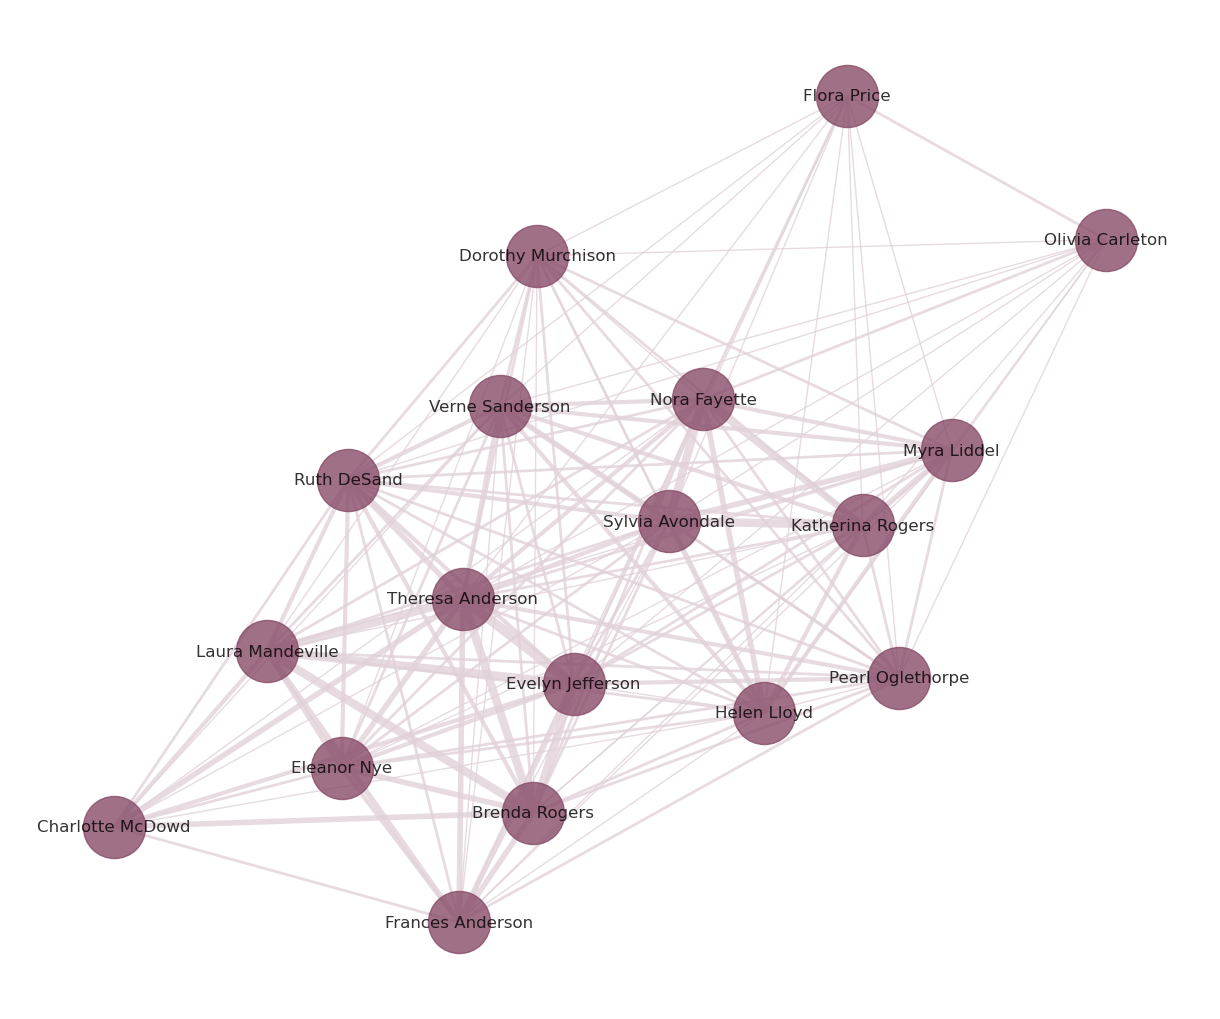

In [14]:
nx.draw(W, with_labels=True, node_size=2000, node_color="#884c69", font_size=12, 
                width=weights, edge_color="#e1d2da", alpha=0.8)

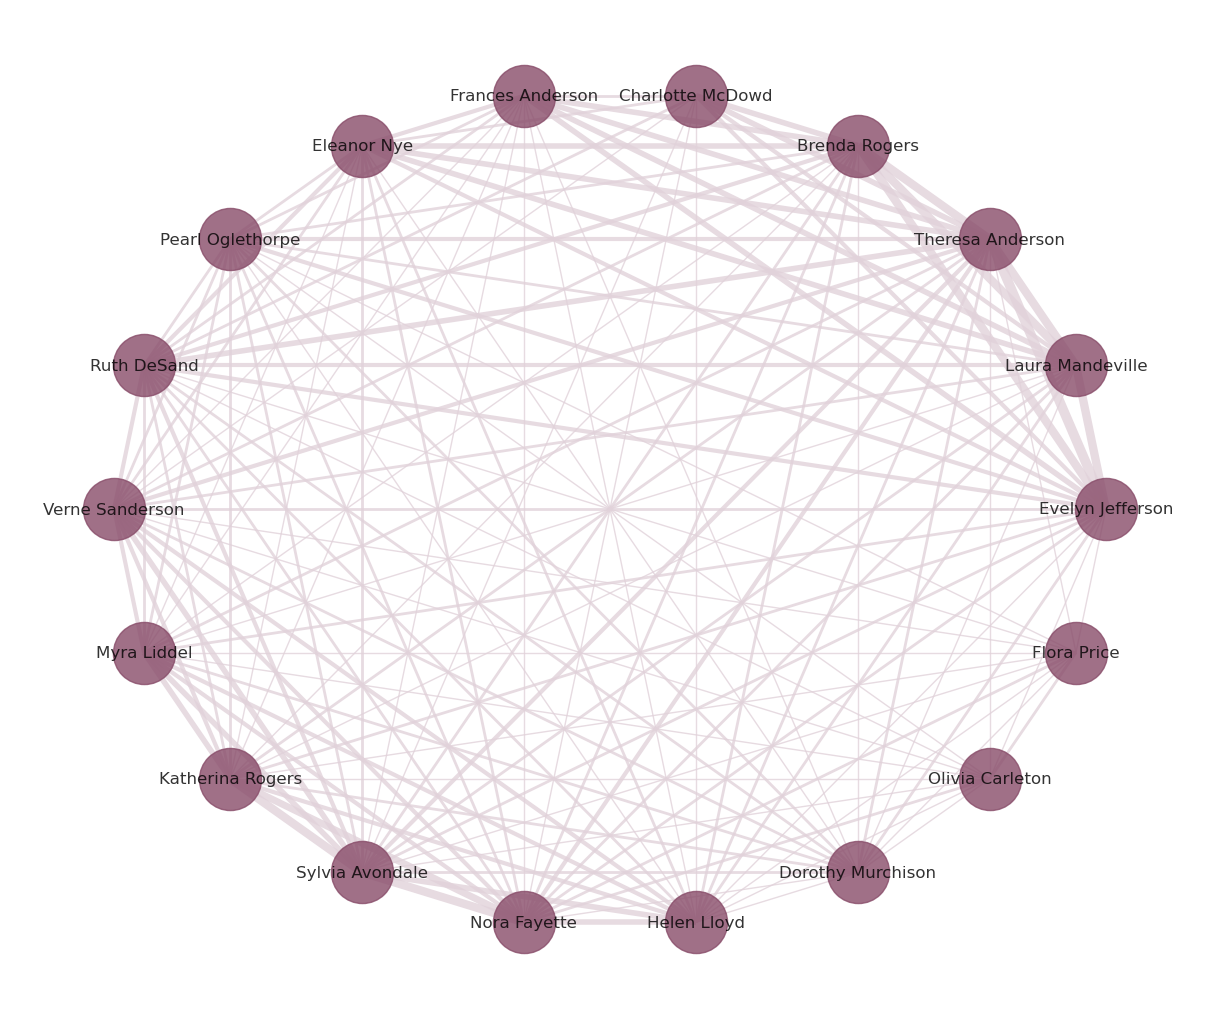

In [16]:
nx.draw_circular(W,width=weights, edge_color="#e1d2da", node_color="#884c69", with_labels=True, node_size=2000, font_size=12,  
                alpha=0.8) 

The Circular layout reveals two distinct zones of influence or 'cliques'. One cluster revolves around the top right corner, encompassing Evelyn, Laura, Theresa, and Brenda, while the other is situated around the bottom left, involving Katherina, Sylvia, and Nora. Unlike the Spring layout graph above, which clearly identified the most influential individuals, the presence of these two separate cliques was not immediately evident in that arrangement.

Clubs

Club Degrees

In [17]:
# project bipartite graph onto club nodes
C = bipartite.projected_graph(G, clubs)
print('')
print("#Clubs")
    
C_degrees = {}
for c in clubs:
    C_degrees[c] = C.degree(c)

for c in sorted(C_degrees, key=C_degrees.get, reverse=True):
  print(C_degrees[c], c)


#Clubs
13 E6
13 E7
13 E8
13 E9
8 E1
8 E2
8 E3
8 E4
8 E5
8 E10
8 E11
8 E12
8 E13
8 E14


Four clubs (E6, E7, E8, and E9) clearly stand out as more influential than the rest when looking only at degrees or number of connnections.

Club Weights

In [18]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
C1 = bipartite.weighted_projected_graph(G, clubs)
print('')
print("#Club attendance, Clubs")

C_weights = {}
for c in clubs:
    C_weights[c] = C1.degree(c, weight='weight')

for c in sorted(C_weights, key=C_weights.get, reverse=True):
  print(C_weights[c], c)



#Club attendance, Clubs
59 E8
48 E7
46 E9
41 E6
38 E5
32 E3
28 E12
25 E10
23 E4
20 E2
19 E1
18 E13
18 E14
13 E11


The four clubs (E6, E7, E8, and E9) continue to exhibit notable prominence compared to others when considering weighted influence. However, E8 distinctly surpasses all others, including the other top three, in terms of weight evaluation.

Club Network Graphs

In [1]:
weights=[edata['weight'] for f,t,edata in C1.edges(data=True)]

NameError: name 'C1' is not defined

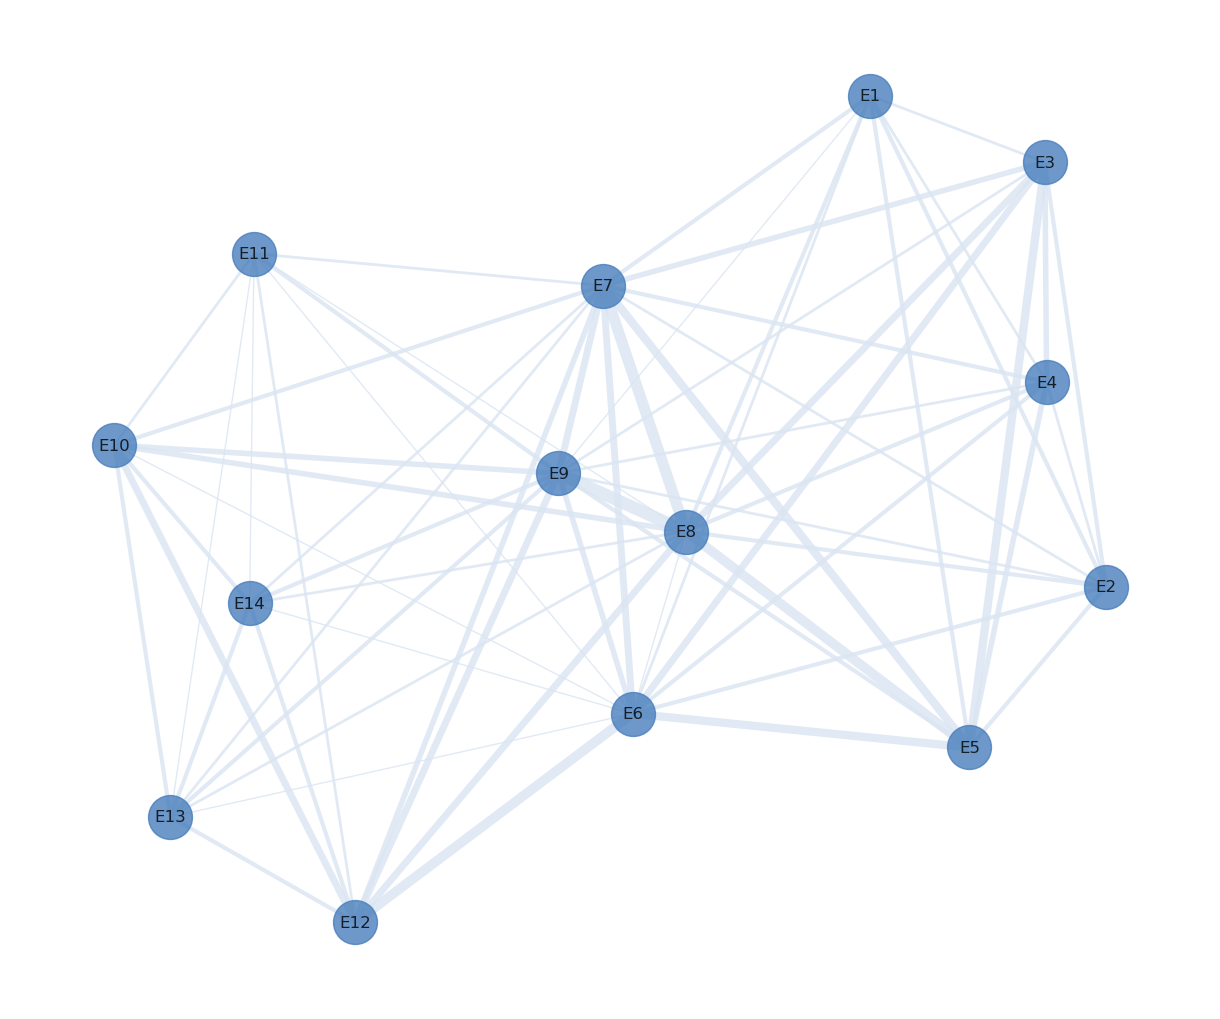

In [20]:
nx.draw(C,with_labels=True, node_size=1000, node_color="#487ebc", font_size=12, 
                width=weights, edge_color="#dae5f2", alpha=0.8)

In the Spring layout graph, the four most influential clubs (E6, E7, E8, and E9) are prominently situated at the center of the 'bowtie' shape. Additionally, it's evident that E5, E3, and E12 are closely trailing behind them.

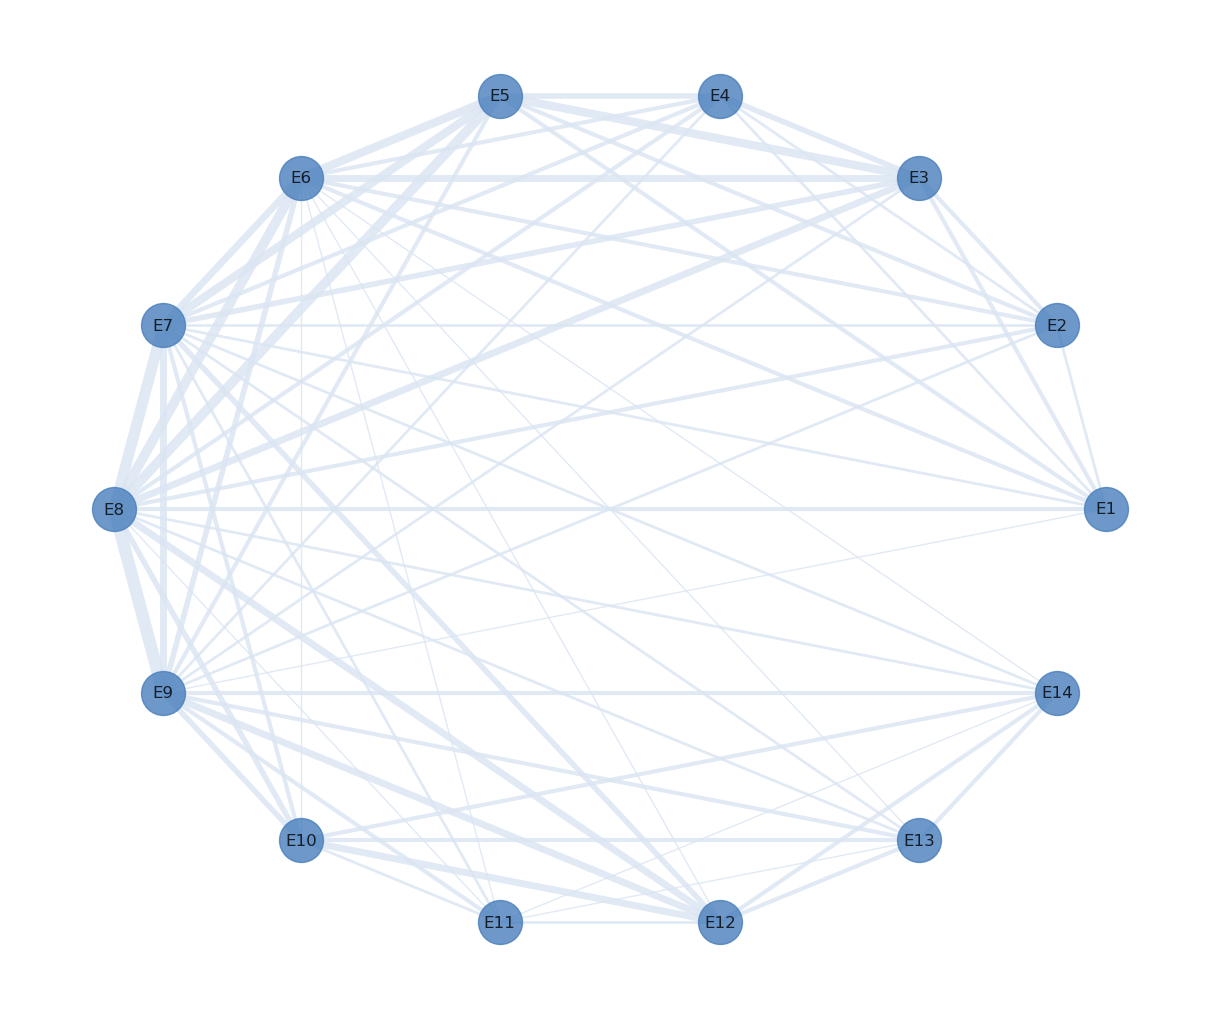

In [21]:
nx.draw_circular(C1, width=weights, edge_color="#dae5f2", node_color="#487ebc", with_labels=True, node_size=1000, font_size=12,
                alpha=0.8) 


The Circular layout makes missing connections easier to spot for instance between E1 and E10 through E14 and between E14 and E1 through E5.

Bimodal Graphs

draw_spring layout

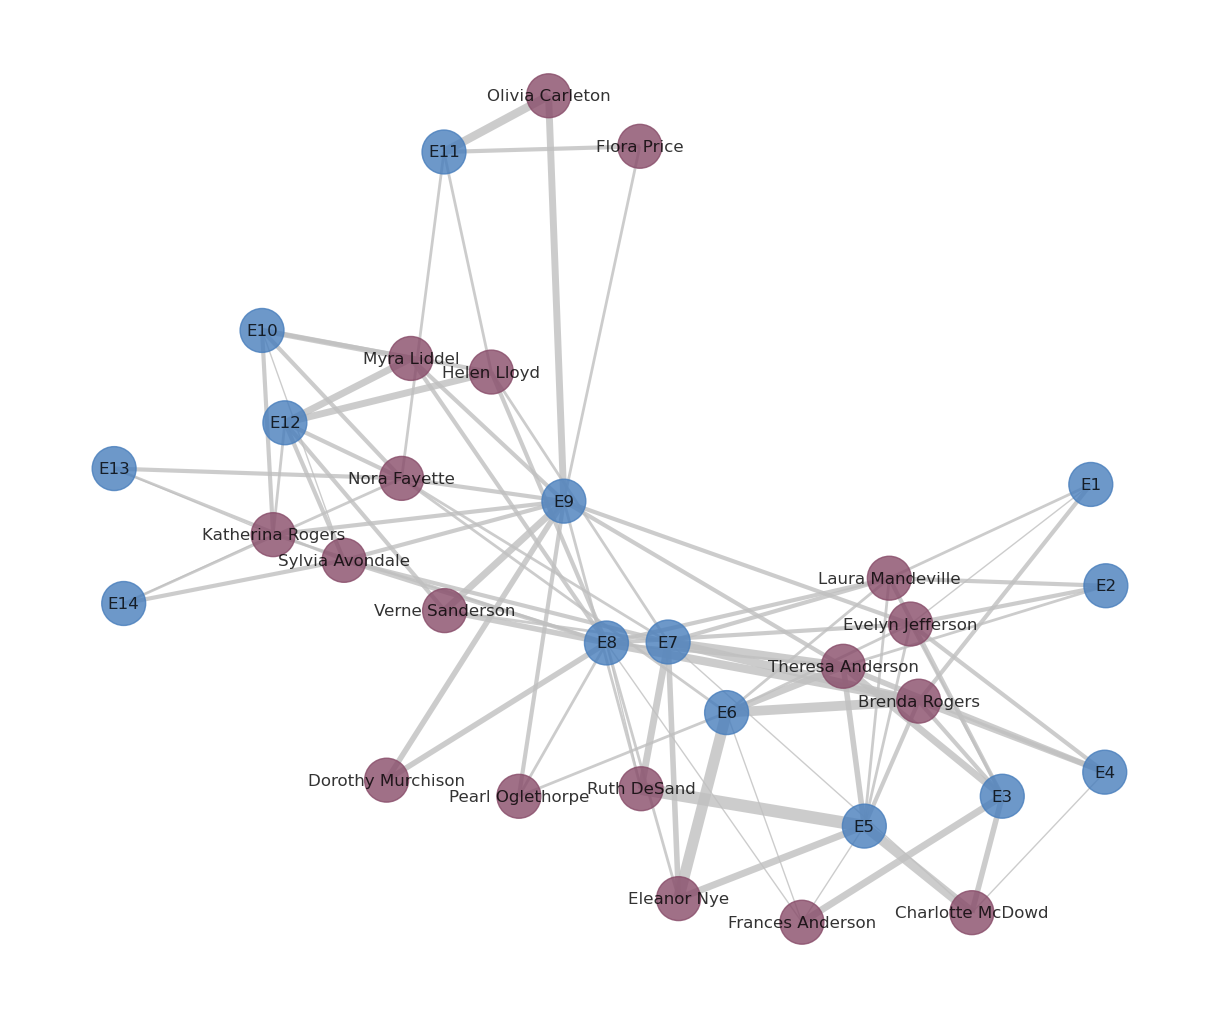

In [26]:
colors = []
for node, data in G.nodes(data=True):
    if data['bipartite'] == 1:
        colors.append('#487ebc')         
    else:
        colors.append('#884c69')

nx.draw(G, with_labels=True, node_size=1000, node_color=colors, font_size=12, 
                 width=weights, edge_color="silver", alpha=0.8)

draw_circular layout

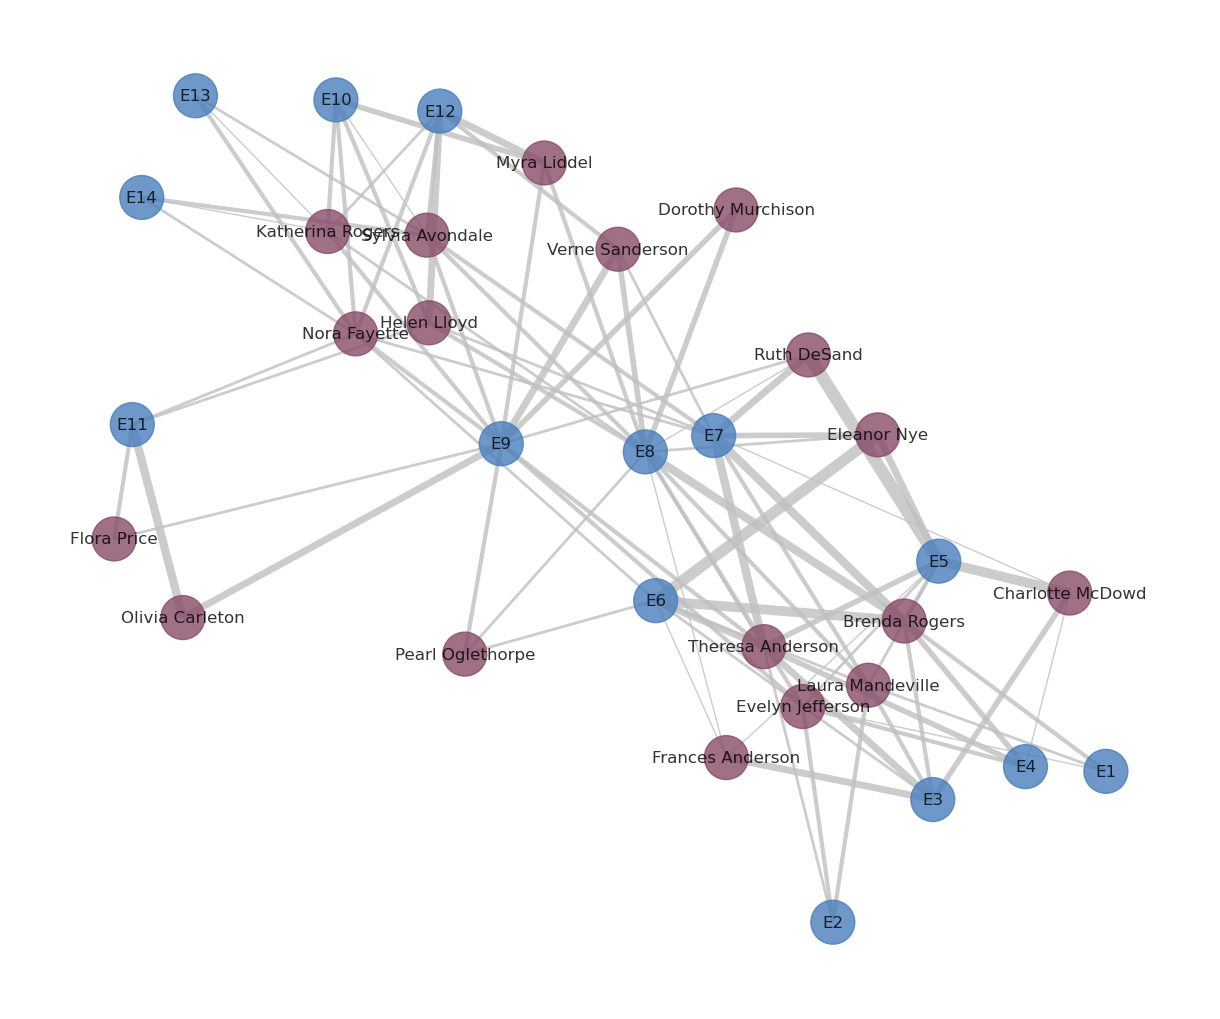

In [27]:
colors = []
for node, data in G.nodes(data=True):
    if data['bipartite'] == 1:
        colors.append('#487ebc')         
    else:
        colors.append('#884c69')

nx.draw(G, with_labels=True, node_size=1000, node_color=colors, font_size=12, 
                 width=weights, edge_color="silver", alpha=0.8)

draw_circular layout

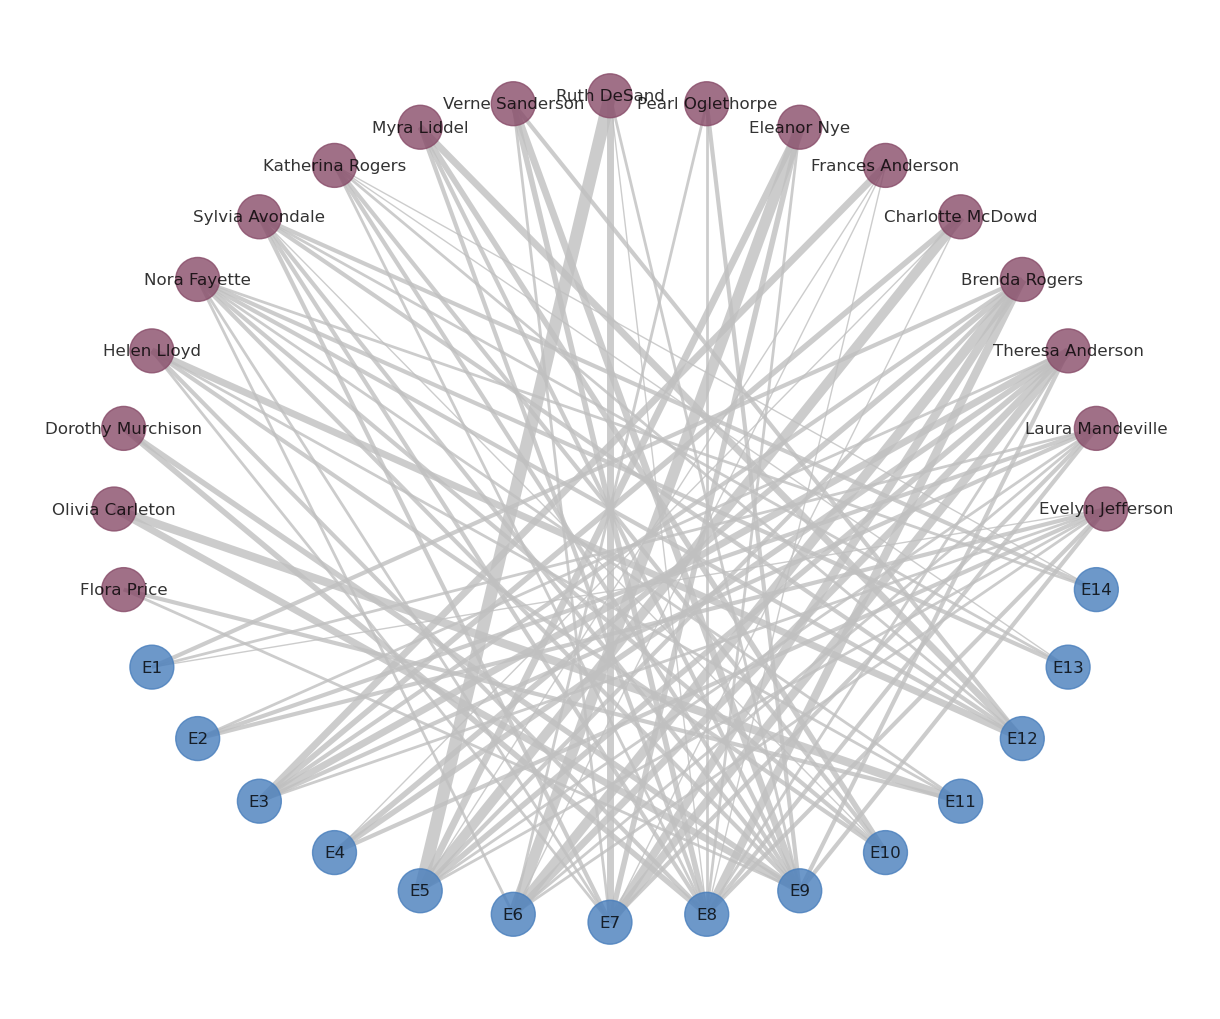

In [28]:
nx.draw_circular(G, with_labels=True, node_size=1000, node_color=colors, font_size=12, 
                 width=weights, edge_color="silver", alpha=0.8)

The draw_circular layout proves to be notably superior for this specific network. Relationships are considerably clearer in both the individual node network graphs and the bimodal network graph.

Conclusion

Women
- Theresa Anderson stands out as the most engaged and influential participant in club activities.
- Evelyn Jefferson, Brenda Rodgers, Sylvia Avondale, Laura Mandeville, and - Nora Fayette also wield considerable influence, although their involvement may vary across different clubs.
- Flora Rice and Olivia Carlenton appear to be somewhat detached from club involvement.
- Another group comprising Nora Fayette, Sylvia Avondale, and Katherina Rogers demonstrates notable activity across similar clubs.

Clubs:
- Clubs E6, E7, E8, and E9 emerge as the most popular choices among members.
- Conversely, clubs E1, E13, and E14 are among the least frequented.

The four most active women and the four most popular clubs:
- Theresa Anderson is present in all four of the most influential clubs: E6, E7, E8, and E9.
- Evelyn Jefferson attends clubs E6, E8, and E9 but not E7.
- Brenda Rodgers participates in clubs E6, E7, and E8 but not E9.
- Sylvia Avondale is involved in clubs E7, E8, and E9 but not E6.




